In [1]:
#Imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Getting the dataset
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git ../data/raw/clothing-dataset-small/

Cloning into '../data/raw/clothing-dataset-small'...
Updating files:  12% (469/3783)
Updating files:  13% (492/3783)
Updating files:  14% (530/3783)
Updating files:  15% (568/3783)
Updating files:  16% (606/3783)
Updating files:  17% (644/3783)
Updating files:  18% (681/3783)
Updating files:  19% (719/3783)
Updating files:  20% (757/3783)
Updating files:  21% (795/3783)
Updating files:  22% (833/3783)
Updating files:  23% (871/3783)
Updating files:  23% (902/3783)
Updating files:  24% (908/3783)
Updating files:  25% (946/3783)
Updating files:  26% (984/3783)
Updating files:  27% (1022/3783)
Updating files:  28% (1060/3783)
Updating files:  29% (1098/3783)
Updating files:  29% (1112/3783)
Updating files:  30% (1135/3783)
Updating files:  31% (1173/3783)
Updating files:  32% (1211/3783)
Updating files:  33% (1249/3783)
Updating files:  34% (1287/3783)
Updating files:  35% (1325/3783)
Updating files:  36% (1362/3783)
Updating files:  37% (1400/3783)
Updating files:  38% (1438/3783)
Updati

In [2]:
train_path = '../data/raw/clothing-dataset-small/train/'
val_path = '../data/raw/clothing-dataset-small/validation/'
test_path = '../data/raw/clothing-dataset-small/test/'

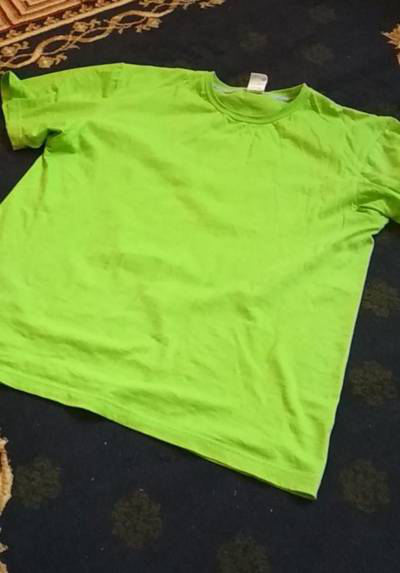

In [3]:
import glob
from PIL import Image
import random
clothing_list = glob.glob('../data/raw/clothing-dataset-small/train/**/*.*', recursive=True)
Image.open(random.choice(clothing_list))

In [4]:
!pip install deepfeatx --user

  Using cached deepfeatx-0.1.0b0-py3-none-any.whl (17 kB)


In [5]:
from deepfeatx.image import ImageFeatureExtractor

In [6]:
fe = ImageFeatureExtractor()

94781440/94765736 [==============================] - 9s 0us/step


In [7]:
df = fe.extract_features_from_directory(train_path,
                                   classes_as_folders=True,
                                   export_class_names=True)

Found 3068 images belonging to 10 classes.
96/96 [==============================] - 458s 5s/step


In [8]:
val = fe.extract_features_from_directory(val_path,
                                   classes_as_folders=True,
                                   export_class_names=True)

Found 341 images belonging to 10 classes.
11/11 [==============================] - 49s 4s/step


In [9]:
test = fe.extract_features_from_directory(test_path,
                                   classes_as_folders=True,
                                   export_class_names=True)

Found 372 images belonging to 10 classes.
12/12 [==============================] - 53s 4s/step


In [10]:
df.head()

,filepaths,classes,0,1,2,3,4,5,6,7,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,../data/raw/clothing-dataset-small/train/dress...,dress,0.042461,1.875369,0.000000,2.060592,0.433917,0.005656,0.026123,0.333476,...,0.307835,1.056875,0.000000,0.003265,0.000000,0.000000,0.027120,0.436058,0.000000,0.390339
1,../data/raw/clothing-dataset-small/train/dress...,dress,0.025774,0.953888,0.336729,0.000000,0.025267,0.212971,0.074701,0.000000,...,0.059056,0.204013,0.000000,0.103855,0.182375,0.446977,0.000228,1.121514,0.143793,1.256672
2,../data/raw/clothing-dataset-small/train/dress...,dress,0.051303,4.518894,0.000000,0.330947,0.476870,0.046684,0.606201,0.479695,...,1.242171,0.000000,0.582221,0.000000,0.000000,0.119603,0.013267,0.004081,0.166751,0.233877
3,../data/raw/clothing-dataset-small/train/dress...,dress,0.022691,0.481849,0.146194,0.000000,0.020019,0.288918,0.528619,0.008216,...,1.658856,0.004760,0.000000,0.003752,0.002769,0.065089,0.065709,0.077568,0.362169,0.592692
4,../data/raw/clothing-dataset-small/train/dress...,dress,0.231369,2.579857,0.157428,0.628243,2.256974,0.084941,0.744961,0.094804,...,0.172142,0.131973,0.050735,0.010276,0.122934,0.329141,1.164256,1.709701,0.189396,3.573071


In [11]:
df.shape

(3068, 2050)

In [12]:
X_train = df.drop(['filepaths', 'classes'], axis=1)
y_train = df['classes']

In [13]:
X_val = val.drop(['filepaths', 'classes'], axis=1)
y_val = val['classes']

In [14]:
X_test = test.drop(['filepaths', 'classes'], axis=1)
y_test = test['classes']

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr = LogisticRegression(max_iter=10000, random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [17]:
lr.score(X_test, y_test)

0.8924731182795699

In [18]:
from sklearn.metrics import classification_report

In [19]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       dress       0.93      0.87      0.90        15
         hat       1.00      0.92      0.96        12
  longsleeve       0.85      0.85      0.85        72
     outwear       0.89      0.84      0.86        38
       pants       0.93      0.98      0.95        42
       shirt       0.71      0.65      0.68        26
       shoes       1.00      0.99      0.99        73
      shorts       0.87      0.90      0.89        30
       skirt       0.85      0.92      0.88        12
     t-shirt       0.85      0.90      0.88        52

    accuracy                           0.89       372
   macro avg       0.89      0.88      0.88       372
weighted avg       0.89      0.89      0.89       372



In [20]:
directory = '../models'
if not os.path.exists(directory):
    os.makedirs(directory)
import pickle
pickle.dump(lr, open('../models/logistic_regression.pkl', 'wb'))

In [21]:
import pickle
model = pickle.load(open('../models/logistic_regression.pkl', 'rb'))

In [22]:
model.classes_

array(['dress', 'hat', 'longsleeve', 'outwear', 'pants', 'shirt', 'shoes',
       'shorts', 'skirt', 't-shirt'], dtype=object)

In [23]:
import gradio as gr
from PIL import Image
def recognize_clothing(img):
    #img=Image.fromarray(img)
    vector = fe.img_to_vector(img)
    label = lr.predict(vector)
    confidence = lr.predict_proba(vector)
    return label[0], confidence[0]

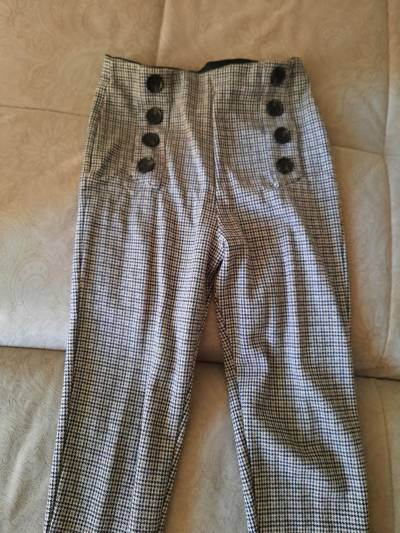

In [28]:
clothing_list = glob.glob('../data/raw/clothing-dataset-small/train/**/*.*', recursive=True)
img=Image.open(random.choice(clothing_list))
img

In [29]:
vector = fe.img_to_vector(img)

In [30]:
recognize_clothing(img)

('pants',
 array([2.79978019e-04, 1.31493154e-05, 2.15660770e-04, 2.69742178e-03,
        9.96599872e-01, 9.93316797e-05, 3.74341878e-06, 9.07288896e-05,
        1.13311239e-07, 5.80648708e-10]))

In [31]:
gr.Interface(fn=recognize_clothing, inputs="image", outputs="text").launch(debug=True)

Running locally at: http://127.0.0.1:7860/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


KeyboardInterrupt: 